In [1]:
%%bash
# Extract raw data
tar -zxf ../raw_data/20181214.tar.gz -C ../raw_data

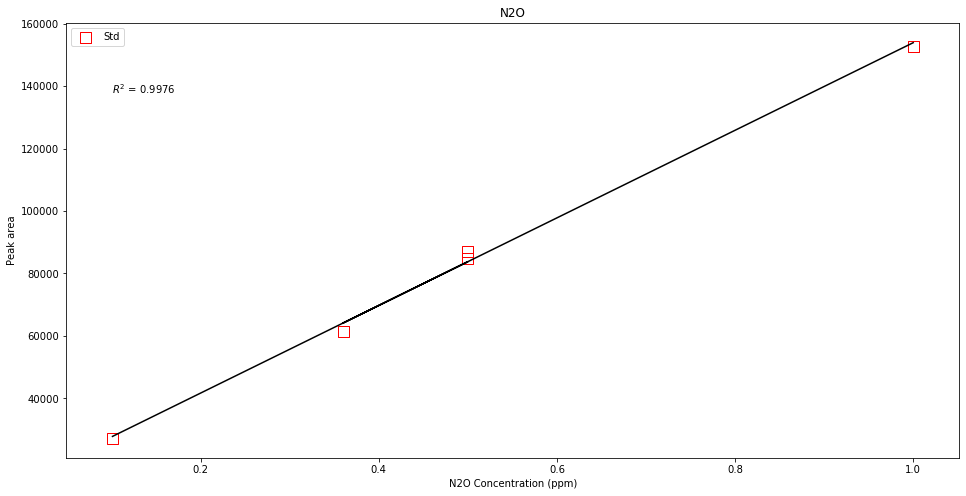

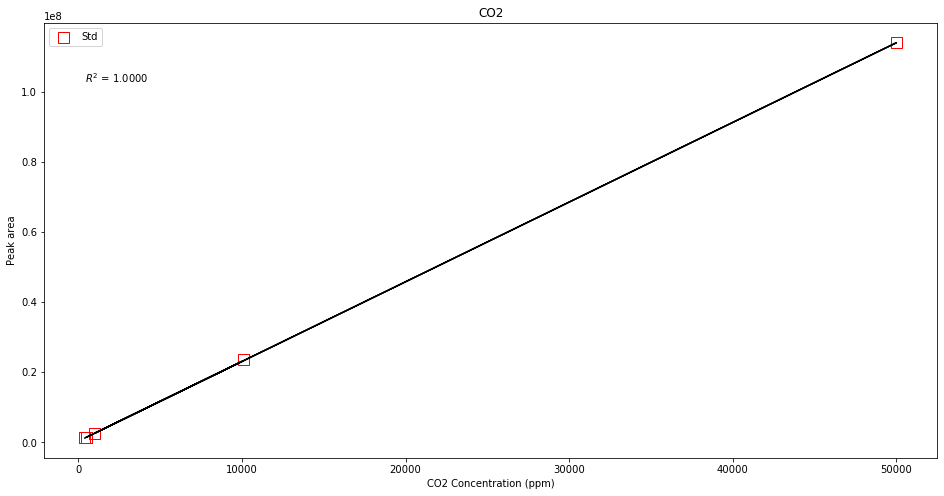

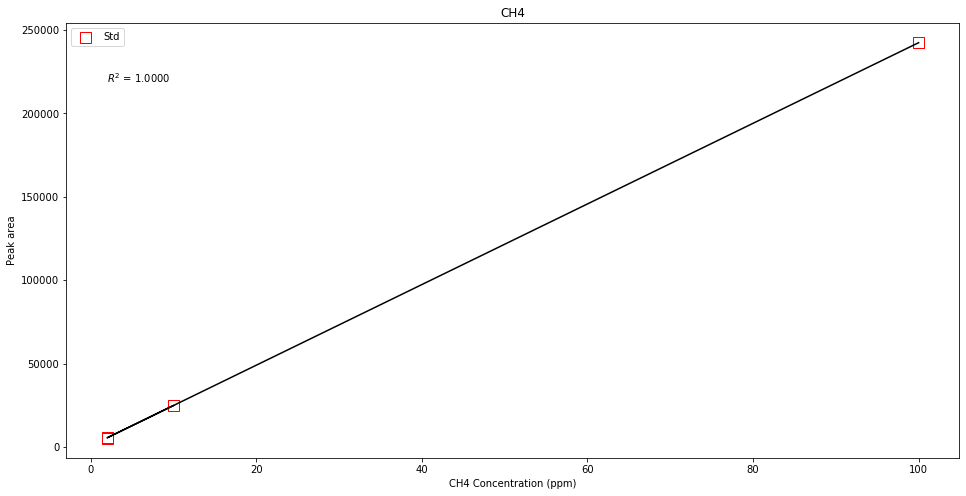

In [2]:
%matplotlib inline

# Import important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Import user-defined module with regression and plotting functions
from src.calibrate import *

# Import the csv data as a dataframe
df = pd.read_csv("../raw_data/20181214/GC_run_20181214.csv",comment='#')
N2Ostd  = df[df['Sample_name'].str.contains("N2OStd")].copy()
CO2std  = df[df['Sample_name'].str.contains("CO2Std")].copy()
CH4std  = df[df['Sample_name'].str.contains("CH4Std")].copy()
samples = df[df['Sample_name'].str.contains("NT")].copy()

# Convert the data types to numeric
CO2std_x = CO2std.loc[:,"CO2_conc"].astype(float)
CO2std_y = CO2std.loc[:,"CO2_peak"].astype(float)
N2Ostd_x = N2Ostd.loc[:,"N2O_conc"].astype(float)
N2Ostd_y = N2Ostd.loc[:,"N2O_peak"].astype(float)
CH4std_x = CH4std.loc[:,"CH4_conc"].astype(float)
CH4std_y = CH4std.loc[:,"CH4_peak"].astype(float)

N2Osam = samples.loc[:,"N2O_peak"].astype(float)
CO2sam = samples.loc[:,"CO2_peak"].astype(float)
CH4sam = samples.loc[:,"CH4_peak"].astype(float)

# Plot the standards with linear regression trendline
plot_standards(N2Ostd_x,N2Ostd_y,"N2O")
plot_standards(CO2std_x,CO2std_y,"CO2")
plot_standards(CH4std_x,CH4std_y,"CH4")

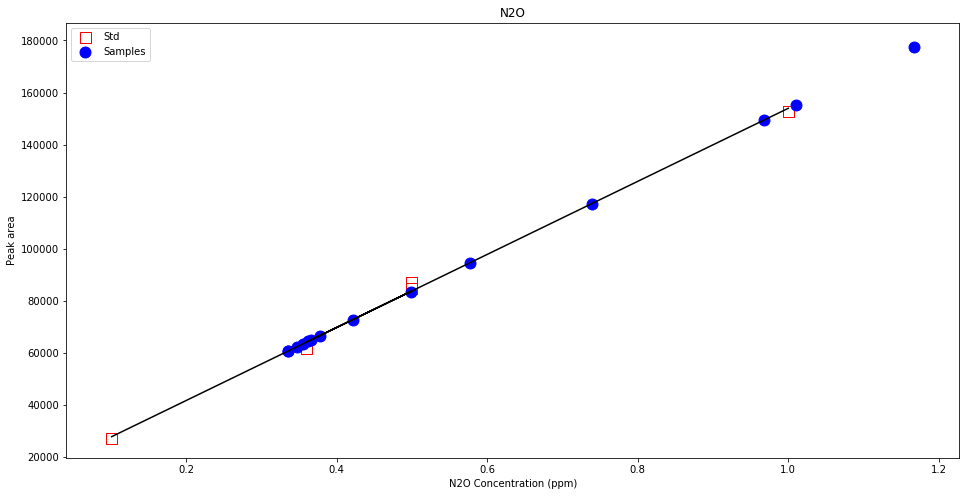

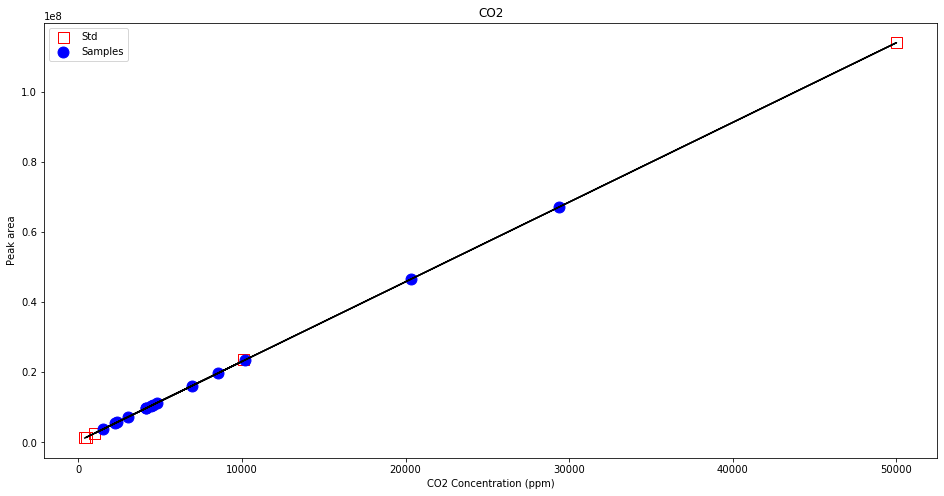

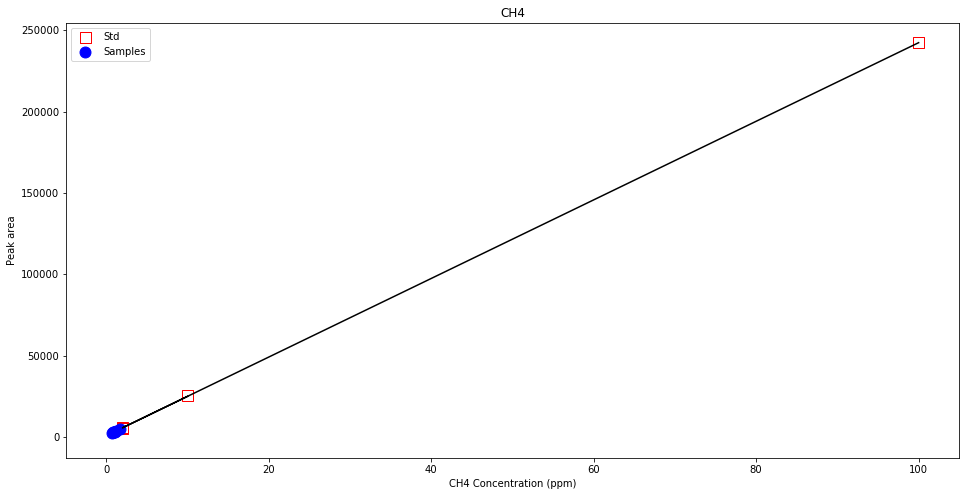

In [3]:
# Now, plot the standards along with the samples
plot_samples(N2Osam, N2Ostd_x, N2Ostd_y, "N2O")
plot_samples(CO2sam, CO2std_x, CO2std_y, "CO2")
plot_samples(CH4sam, CH4std_x, CH4std_y, "CH4")

In [4]:
# Since the data look good, export the sample concentrations to a text file
saveoutput = save_sampleconc(N2Ostd_x, N2Ostd_y, CO2std_x, CO2std_y, 
                             CH4std_x, CH4std_y, 
                             samples, "../processed_data/RVT_TracerTest_GasConcentrations_20181214.txt", 
                             write_to_datafile=True)
print(saveoutput)

    vial location  depth       date method    dup  N2O_conc  N2O_bdl  \
10     0     NTT0   60.0 2018-08-30      G   True  0.739007    False   
11     0     NTT0   30.0 2018-08-30      G   True  0.421670    False   
12     0     NTC1  140.0 2018-08-30      G   True  1.167055    False   
13     0     NTC1   20.0 2018-08-30      G   True  0.377170    False   
14     0     NTC2   30.0 2018-10-24      G  False  0.334809    False   
15     0     NTC2   60.0 2018-10-24      G  False  0.365591    False   
16     0     NTC2   90.0 2018-10-24      G  False  0.355466    False   
17     0     NTC2  120.0 2018-10-24      G  False  0.498312    False   
21     0     NTT2   30.0 2018-10-24      G  False  0.334645    False   
22     0     NTT2   60.0 2018-10-24      G  False  0.361950    False   
23     0     NTT2   60.0 2018-10-24      G   True  0.347414    False   
24     0     NTT2   90.0 2018-10-24      G  False  0.576786    False   
25     0     NTT2  120.0 2018-10-24      G  False  0.967147    F